In [5]:
from singlestep import *

from math import sqrt
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics import mean_squared_error
from keras.layers import Dense,LSTM,Bidirectional,BatchNormalization,Dropout,Conv1D,GRU,MaxPooling1D
from keras.models import Sequential,Model
from keras.layers.merge import concatenate
from keras.callbacks import History, ModelCheckpoint
from keras import optimizers
from keras.engine.input_layer import Input
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler

In [6]:
def n_split(data):  #CORRECT
    train,test=data[0:365*24*1+24*30*2],data[365*24*1+24*30*2:365*24*1+24*30*4]
    train=np.split(train,len(train)/24)
    test=np.split(test,len(test)/24)
    return np.array(train),np.array(test)

In [7]:
def main():

  data_fp=[]
  data_fp.insert(0,'AshokVihar_Hourly.csv')
  data_fp.insert(1,'DCStadium_Hourly.csv')
  data_fp.insert(2,'DwarkaSec8_Hourly.csv')
  data_fp.insert(3,'Okhla_Hourly.csv')
  
  i=0
  for city in data_fp:
    print(city)
    data=pd.read_csv(city,header=0,parse_dates=True,index_col=[0])
    n_input=6
    min=data['PM2.5'].min()
    max=data['PM2.5'].max() 
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
      
    train,test=n_split(data)
    print(train.shape)
    print(test.shape)
    train_x,train_y=to_supervised(train,n_input,1)
    n_timesteps,n_features,n_outputs=train_x.shape[1],train_x.shape[2],train_y.shape[1]
    print(train_x.shape)
    print(train_y.shape)

    model=CNN_GRU(n_timesteps)
    history = fit_model(train_x,train_y,model,0,0)
    scores,final_score= model_eval(train,test,n_input,model,24,0)
    scores=[t*(max-min)+min for t in scores]
    print(scores)
    print(final_score*(max-min)+min)

    filename = 'fm'+str(i)+'.sav'
    pickle.dump(model, open(filename, 'wb'))
    os.remove('best_weights0.hdf5')
    i=i+1



AshokVihar_Hourly.csv
(425, 24, 20)
(60, 24, 20)
(10194, 6, 20)
(10194, 1)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 6, 1)         0                                            
_________________

Train on 9174 samples, validate on 1020 samples
Epoch 1/5
9174/9174 [==============================] - 144s 16ms/step - loss: 0.0028 - val_loss: 2.9925e-04
Epoch 2/5
9174/9174 [==============================] - 169s 18ms/step - loss: 8.5023e-04 - val_loss: 3.4181e-04
Epoch 3/5
9174/9174 [==============================] - 176s 19ms/step - loss: 7.4127e-04 - val_loss: 1.8515e-04
Epoch 4/5
9174/9174 [==============================] - 134s 15ms/step - loss: 6.6685e-04 - val_loss: 1.7646e-04A: 16s - loss - ETA: 12s  - ETA
Epoch 5/5
9174/9174 [==============================] - 133s 15ms/step - loss: 6.4589e-04 - val_loss: 1.3662e-04
model built
(1440, 1)


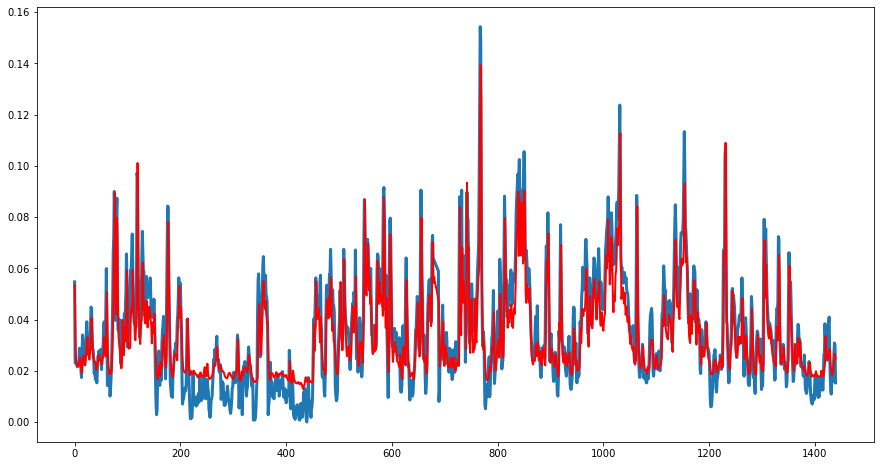

[10.353516544507839, 9.923841595343672, 9.624530815192015, 9.671011872741834, 8.421415616700214, 8.965411422250021, 12.43876897585742, 14.319007469644365, 11.616401569746424, 9.557259398805913, 9.836200106237577, 11.634580862077488, 11.158424938644332, 10.023814143389597, 8.995503040351073, 7.689212150443948, 7.815494846777663, 9.014071479797785, 7.425669551487274, 9.585432037039173, 8.256313047233519, 9.298016939093948, 10.354726618499171, 8.921567798735115]
9.91342207323587
DCStadium_Hourly.csv
(425, 24, 20)
(60, 24, 20)
(10194, 6, 20)
(10194, 1)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_17 (InputLayer)           

Train on 9174 samples, validate on 1020 samples
Epoch 1/5
9174/9174 [==============================] - 150s 16ms/step - loss: 0.0018 - val_loss: 3.1990e-04
Epoch 2/5
9174/9174 [==============================] - 134s 15ms/step - loss: 6.6705e-04 - val_loss: 1.1756e-04
Epoch 3/5
9174/9174 [==============================] - 135s 15ms/step - loss: 6.0399e-04 - val_loss: 1.1886e-04
Epoch 4/5
9174/9174 [==============================] - 129s 14ms/step - loss: 5.0833e-04 - val_loss: 1.0795e-04
Epoch 5/5
9174/9174 [==============================] - 127s 14ms/step - loss: 4.6250e-04 - val_loss: 9.4942e-05
model built
(1440, 1)


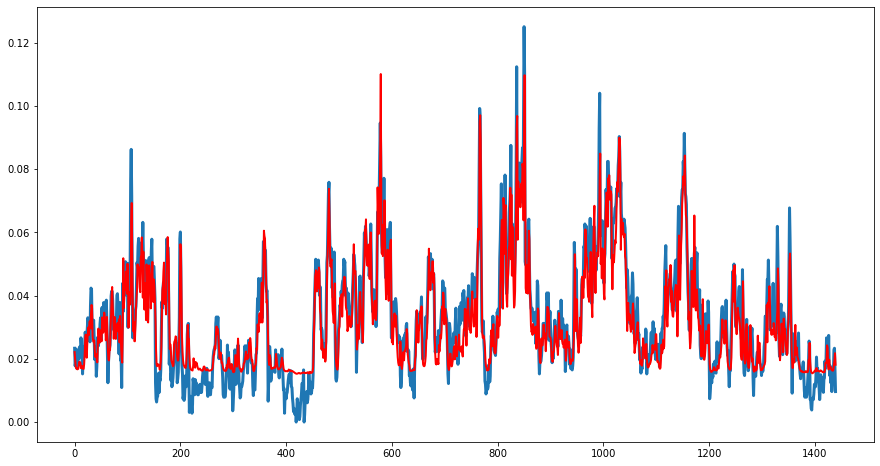

[6.605595325506668, 7.7659503579446145, 5.398010173443707, 6.146416861340803, 4.867348574191756, 6.228386399142134, 6.079699702699179, 5.655758679479554, 7.894209236000707, 11.5577898453216, 10.160979780805224, 8.584688012150336, 9.59961537133913, 8.984452073795875, 8.90413158380442, 7.578785781823663, 6.548789750461247, 6.908100171504353, 6.6604810485849795, 5.7608091927025304, 6.373978748351964, 6.1958127870376005, 5.245413248129505, 5.309609297110514]
7.3316813735559
DwarkaSec8_Hourly.csv
(425, 24, 20)
(60, 24, 20)
(10194, 6, 20)
(10194, 1)
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_32 (InputLayer)           (None

Train on 9174 samples, validate on 1020 samples
Epoch 1/5
9174/9174 [==============================] - 136s 15ms/step - loss: 0.0022 - val_loss: 2.4002e-04
Epoch 2/5
9174/9174 [==============================] - 125s 14ms/step - loss: 7.8241e-04 - val_loss: 2.0958e-04
Epoch 3/5
9174/9174 [==============================] - 124s 13ms/step - loss: 7.5445e-04 - val_loss: 7.8422e-04 - loss: 7.5370
Epoch 4/5
9174/9174 [==============================] - 126s 14ms/step - loss: 6.7748e-04 - val_loss: 1.5987e-04
Epoch 5/5
9174/9174 [==============================] - 126s 14ms/step - loss: 6.4866e-04 - val_loss: 1.6253e-04
model built
(1440, 1)


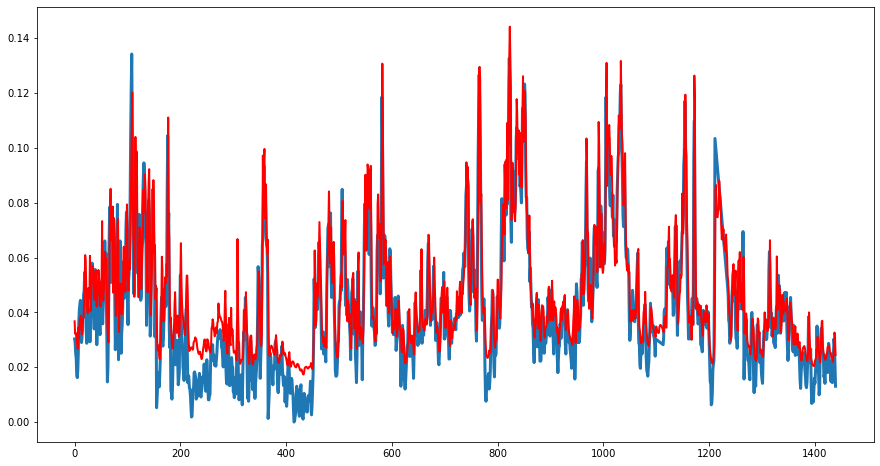

[8.897502863582712, 10.745943488582341, 11.574600330453121, 10.384989571289617, 12.028201214457138, 13.38957205365814, 11.314541254497948, 10.676843745689467, 13.60554268298267, 15.219810479121536, 11.800951681571261, 14.491326981336329, 10.198770425641271, 9.367213573936974, 11.134335072896938, 11.603686646744931, 12.134667960584226, 10.459727508467347, 10.814091644428364, 7.395346685873524, 10.240860102027888, 11.70294912232558, 13.45698045980296, 10.994443784496617]
11.542876149370487
Okhla_Hourly.csv
(425, 24, 20)
(60, 24, 20)
(10194, 6, 20)
(10194, 1)
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_46 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_47 (InputLayer)   

Train on 9174 samples, validate on 1020 samples
Epoch 1/5
9174/9174 [==============================] - 140s 15ms/step - loss: 0.0033 - val_loss: 3.3303e-04
Epoch 2/5
9174/9174 [==============================] - 130s 14ms/step - loss: 7.2382e-04 - val_loss: 2.0378e-04
Epoch 3/5
9174/9174 [==============================] - 130s 14ms/step - loss: 5.9772e-04 - val_loss: 1.1453e-04
Epoch 4/5
9174/9174 [==============================] - 129s 14ms/step - loss: 5.0166e-04 - val_loss: 3.0258e-04
Epoch 5/5
9174/9174 [==============================] - 134s 15ms/step - loss: 5.2554e-04 - val_loss: 1.5119e-04
model built
(1440, 1)


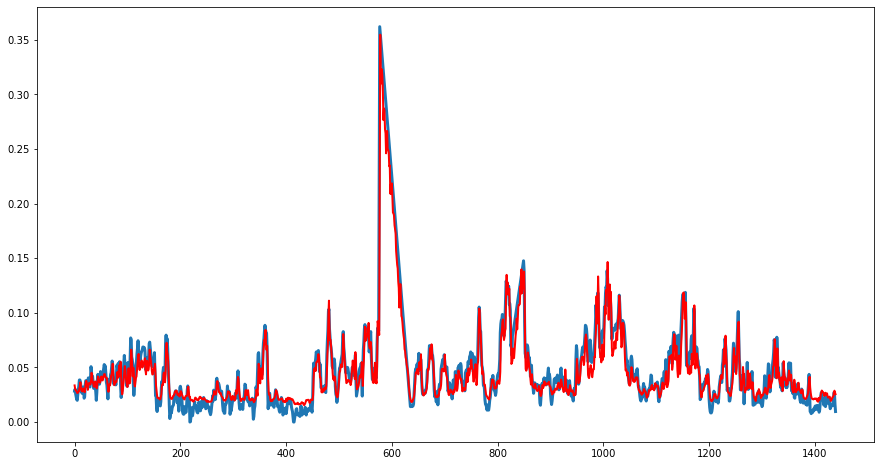

[16.863740657444207, 15.62032334395891, 8.30579927347278, 9.198821835554025, 8.490016820792537, 8.171642453728754, 7.740389221224689, 8.053119624816162, 9.791295142867755, 8.980697104903376, 9.277311213352673, 9.855298164548948, 9.574080877074424, 10.486735305746024, 10.340918375376095, 9.397312943047973, 9.308958404204466, 8.431968249238194, 8.228054979501184, 8.521967985743679, 8.246756057605253, 8.085663639009542, 7.082821310669182, 8.276970642319158]
9.71704200464359


In [8]:
if __name__=='__main__':
  main()